# Nettoyage de donnée

In [1]:
import os, warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
os.listdir()# Pour récupérer le chemin du dataset

['.ipynb_checkpoints',
 'TP1.ipynb',
 'telecom_churn.csv',
 '01_modélisation.ipynb']

In [3]:
dt=pd.read_csv('telecom_churn.csv')

### Visualisation des lignes du dt

In [4]:
dt.head()# pour afficher les 5 premiere lignes
dt.tail()# pour afficher les 5 dernières lignes
dt.sample(5)# pour afficher 5 lignes au hazard

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3219,NY,150,415,No,Yes,35,139.6,72,23.73,332.8,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False
2847,ID,119,415,Yes,Yes,32,173.0,101,29.41,209.4,93,17.80,231.1,91,10.40,12.2,4,3.29,0,False
1956,MS,107,510,No,Yes,30,198.9,87,33.81,207.0,90,17.60,159.8,76,7.19,12.6,4,3.40,3,False
383,IN,117,415,Yes,Yes,22,196.0,82,33.32,322.7,82,27.43,225.6,120,10.15,3.7,5,1.00,1,False
1779,LA,112,510,No,No,0,174.5,127,29.67,259.3,71,22.04,170.5,120,7.67,11.3,7,3.05,1,False


### Information sur la structure du dt

In [29]:
dt.info()# permet de recueillir ations nbr ligne,de column, le nom des column, les valeurs manquantes et les types des column
dt.dtypes.value_counts()# compter les column pour plus de visibiliter sur notre dataset
dt.nunique() # compter le nombre de valeur unique par column
# dt.isana().sum()# compter le nbre de valeur manquante par colonne
dt.duplicated().sum()# compter le nbre de valeur dupliquer par colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

0

<Axes: ylabel='count'>

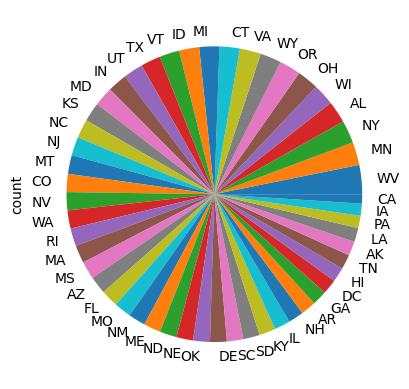

In [6]:
dt.iloc[:,0].value_counts()# si le target en en colonne 0 dans le dataset, permet de compter le nombre de valeur
dt.iloc[:,0].value_counts(normalize=True).round(2)# donne le pourcentage des valeurs de la target
dt.iloc[:,0].value_counts().plot(kind='pie')# pour afficher un diagramme en secteur de ses valeurs

### Nettoyage sur les données

In [8]:
# Transformer le dataframe pour qu'il ne comporte que des donées numérique(facultatif)
Labelencoder=LabelEncoder()
for col in dt.columns:
  dt(col)=labelencoder.fit_transform(dt(col))

#La méthode LabelEncoder n'est pas recommander

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (970269597.py, line 4)

In [9]:
#pour une rapide inspection
dt.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
# Comme nous connaissons la column target, nous allons la renommer target
# On renomme la column class en target
dt=dt.rename(columns={'Churn':'target'})

In [13]:
# on enregistre l'output de la commande nunique dans une variable
tap=dt.nunique()

In [14]:
# On vérifie à travers un filtre qu'il y a une column qui a un seul élément comme enregistrement sur toute les lignes
tap[tap==1]

Series([], dtype: int64)

In [16]:
# On récupère l'index des colonne trouvé
cols=tap[tap==1].index
cols

Index([], dtype='object')

In [17]:
#on supprime la colonne trouvée car elle a peu d'intérêt dans notre jeu de
dt.drop(columns=cols,inplace=True)
# Vérifie si la suppression a bien été fait
dt.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

### Exporter au format csv

In [ ]:
dt.to_csv('chemin/nom_du_fichier',index=False)
# l'attribut index=false permet de ne pas enregistrer l'index des ligne du dataset 

# Preparation et entrainement d'un classifieur naîf

### Séparation des features et des target

In [18]:
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
# estimateur
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

Charger le dataframe que vous avez importer dans la partie précédente et visualiser si tout est bon

In [21]:
#séparation des target(donnée de sortie) et feature(donnée d'entrée)
# souvenez vous on avait nommé la colonne des targets --target
x=dt.drop(columns='target')
y=dt.target
# Vous pouvez voir vos tableau en faisant
x.head()
y.head()

0    False
1    False
2    False
3    False
4    False
Name: target, dtype: bool

In [22]:
# on transforme nos x et y en feature et target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Vous pouvez voir la taille de chaque tableau créer avec la méthode shape

### Construction du classifier naif (Dummy classifier)

Il est bien de programmer un classifieur naif pour prendre ses repère. Savoir quel performance peut donner le plus basique des classifieur sur un tel jeu de donnée

In [23]:
#Instanciation du dummyclassifieur 
estimator=DummyClassifier(strategy='most_frequent')
#Entrainement du classifieur sur les données d'entrainement
estimator.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [24]:
#Test sur les données de test
y_predict=estimator.predict(X_test)
y_predict

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [25]:
# Calculons les valeurs présente dans ce vecteur. Noter que pour pouvoir appelé la fonction value_counts il faut un objet de type série d'où...
pd.Series(y_predict).value_counts()
#Notre classifieur ne fait que renvoyer la valeur la plus présente dans notre vecteur

False    1000
Name: count, dtype: int64

In [26]:
# ON récupère le score de précision pour chaque ensemble
tr_score=estimator.score(X_train,y_train).round(4)
te_score=estimator.score(X_test,y_test).round(4)
print(f"score train:{tr_score} score test:{te_score}")

score train:0.8543 score test:0.857


In [27]:
# une fonction pour récupérer le score
def score(estimator):
  """ compute and print train score and test scorez"""
  tr_score=estimator.score(X_train,y_train).round(4)
  te_score=estimator.score(X_test,y_test).round(4)
  print(f"score train:{tr_score} score test:{te_score}")

In [28]:
score(estimator)

score train:0.8543 score test:0.857
